<a href="https://colab.research.google.com/github/ldennis1/CA03/blob/main/CA03_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
  #package for endocing
from sklearn.preprocessing import LabelEncoder
  #package for building model 
from sklearn.tree import DecisionTreeClassifier
  #packages for visualization
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
  #packages for model evaluation 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
#Read in the data from url 
url = "https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true"
census = pd.read_csv(url, encoding = "ISO-8859-1")

# Part 1


1.1 : Data Quality Analysis

In [ ]:
#inside look at our data
census.head()
census.tail()

hours_per_week_bin occupation_bin  msr_bin  ...           age_bin  flag  y
48837           b. 31-40        e. High   b. Mid  ...  d. 36-40 & 56-60  test  0
48838           b. 31-40   b. Mid - Low   a. Low  ...  c. 31-35 & 61-70  test  0
48839   d. 41-50 & 61-70        e. High  c. High  ...  d. 36-40 & 56-60  test  0
48840           b. 31-40   b. Mid - Low   a. Low  ...          e. 40-55  test  0
48841           e. 51-60        e. High  c. High  ...  c. 31-35 & 61-70  test  1

[5 rows x 11 columns]

In [ ]:
#Descriptive Statistics 
census.describe() 

y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

In [ ]:
#Total Rows and Columns
census.shape

(48842, 11)

In [ ]:
#Any null values?
census.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [ ]:
#Dispay range, column, number of non-null, datatype and memory info
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


1.2 : Expoloratory Data Analysis

**Our Exploratory Variables:** 

    1. Age (5 bins)
    2. Capital Gain/Loss (3 bins)
    3. Education (5 bins)
    4. Hours per Week (5 bins)
    5. Marriage Status & Relationship (3 bins)
    6. Occupation (5 bins)
    7. Race & Sex (3 bins) 

>** For all visualizations below, when y=0, income is 50k or below and when y=1, income is above 50k **




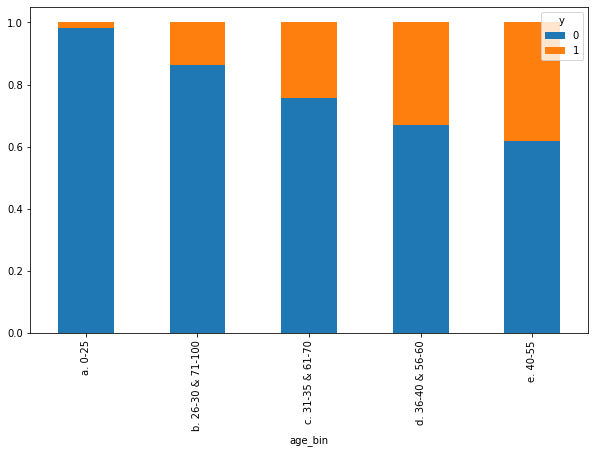

In [ ]:
#Age Bin Analysis
agecrosstab = pd.crosstab(index = census.age_bin, columns = census.y, normalize = 'index')
agecrosstab.plot(kind='bar', stacked=True, figsize = (10,6))

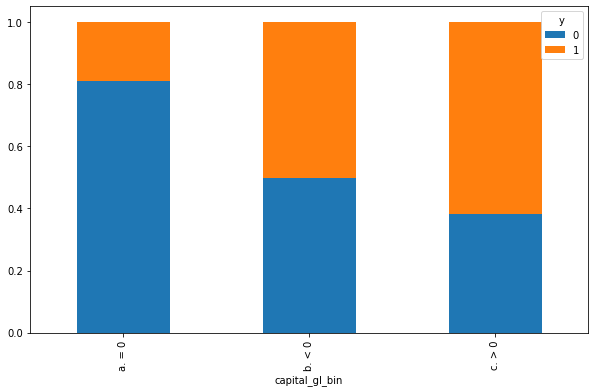

In [ ]:
#Capital Gain Bin Analysis
capitalgaincrosstab = pd.crosstab(index = census.capital_gl_bin, columns = census.y, normalize = 'index')
capitalgaincrosstab.plot(kind='bar', stacked=True, figsize = (10,6))

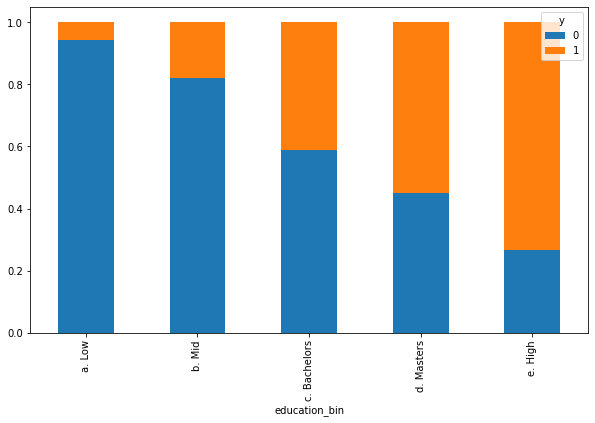

In [ ]:
#Education Bin Analysis
educationcrosstab = pd.crosstab(index = census.education_bin, columns = census.y, normalize = 'index')
educationcrosstab.plot(kind='bar', stacked=True, figsize = (10,6))

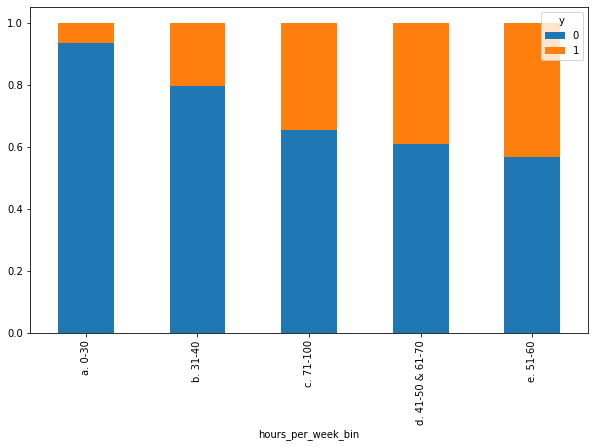

In [ ]:
#Hours Per Week Bin Analysis
hourscrosstab = pd.crosstab(index = census.hours_per_week_bin, columns = census.y, normalize = 'index')
hourscrosstab.plot(kind='bar', stacked=True, figsize = (10,6))

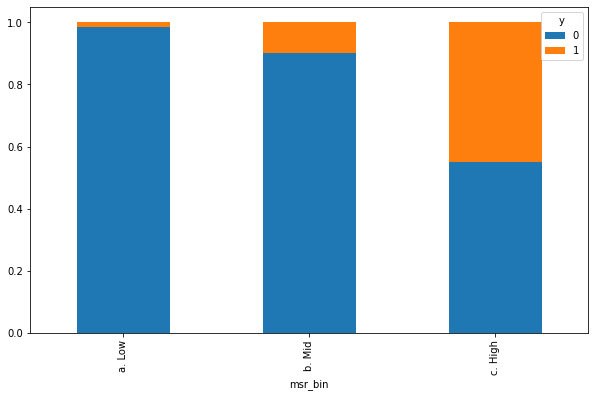

In [ ]:
#Marriage Status and Relationship Bin Analysis
msrcrosstab = pd.crosstab(index = census.msr_bin, columns = census.y, normalize = 'index')
msrcrosstab.plot(kind='bar', stacked=True, figsize = (10,6))

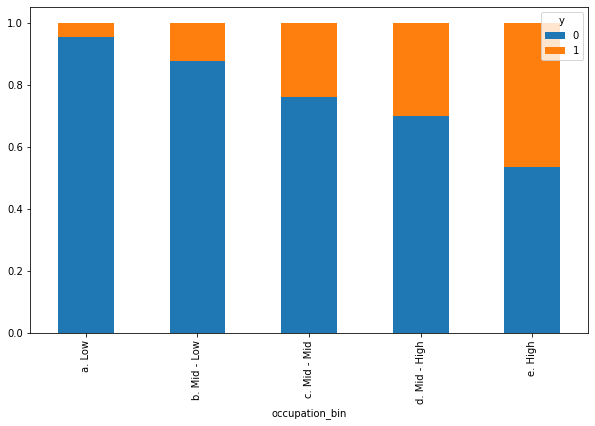

In [ ]:
#Occupation Bin Analysis
occupationcrosstab = pd.crosstab(index = census.occupation_bin, columns = census.y, normalize = 'index')
occupationcrosstab.plot(kind='bar', stacked=True, figsize = (10,6))

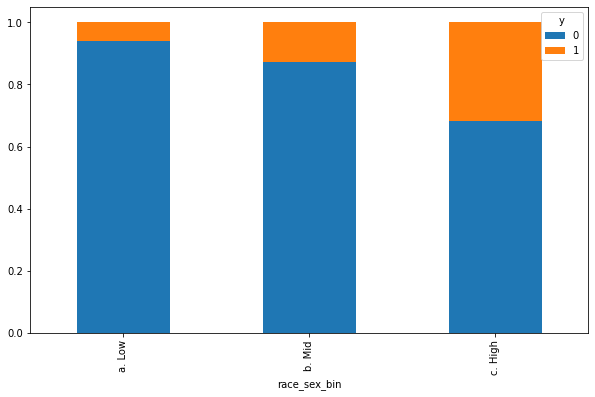

In [ ]:
#Race and Sex Bin Analysis
racesexcrosstab = pd.crosstab(index = census.race_sex_bin, columns = census.y, normalize = 'index')
racesexcrosstab.plot(kind='bar', stacked=True, figsize = (10,6))

#Part 2

2.3 : Build Decision Tree Classifier Models

**Step 1**: Our variables are currently type=object, so we must make them type=category in order to encode them in the next step 

In [ ]:
for column in ['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']:
    census[column] = census[column].astype('category')

**Step 2**: Check that column types converted correctly 

In [ ]:
census.info()
#we will remove flag and y columns when we split our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   hours_per_week_bin  48842 non-null  category
 1   occupation_bin      48842 non-null  category
 2   msr_bin             48842 non-null  category
 3   capital_gl_bin      48842 non-null  category
 4   race_sex_bin        48842 non-null  category
 5   education_num_bin   48842 non-null  category
 6   education_bin       48842 non-null  category
 7   workclass_bin       48842 non-null  category
 8   age_bin             48842 non-null  category
 9   flag                48842 non-null  object  
 10  y                   48842 non-null  int64   
dtypes: category(9), int64(1), object(1)
memory usage: 1.2+ MB


**Step 3**: Use encoding to change values to an integer 

In [ ]:
# Import label encoder - see initial import packages cell
# label_encoder object knows how to understand word labels. 
 
census[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']]= census[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']].apply(LabelEncoder().fit_transform) 
#check that the output is as expected
census.head()

hours_per_week_bin  occupation_bin  msr_bin  ...  age_bin   flag  y
0                   1               1        1  ...        3  train  0
1                   0               4        2  ...        4  train  0
2                   1               0        1  ...        3  train  0
3                   1               0        2  ...        4  train  0
4                   1               4        2  ...        1  train  0

[5 rows x 11 columns]

**Step 4**: Split data into test and train datasets based on flag column

In [ ]:
#create train dataframe 
train = census.loc[census.flag == 'train']
#create test dataframe 
test = census.loc[census.flag == 'test']

In [ ]:
#look into the train datframe 
train.head()
train.tail()

hours_per_week_bin  occupation_bin  msr_bin  ...  age_bin   flag  y
32556                   1               3        2  ...        1  train  0
32557                   1               1        2  ...        3  train  1
32558                   1               1        1  ...        3  train  0
32559                   0               1        0  ...        0  train  0
32560                   1               4        2  ...        4  train  1

[5 rows x 11 columns]

In [ ]:
#look into the test datframe 
test.head()
test.tail()

hours_per_week_bin  occupation_bin  msr_bin  ...  age_bin  flag  y
48837                   1               4        1  ...        3  test  0
48838                   1               1        0  ...        2  test  0
48839                   3               4        2  ...        3  test  0
48840                   1               1        0  ...        4  test  0
48841                   4               4        2  ...        2  test  1

[5 rows x 11 columns]

In [ ]:
#the flag column is no longer needed, so we can drop said column
train.drop(columns='flag', inplace=True)
test.drop(columns='flag', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#verify column was dropped
train.head()
test.head()

hours_per_week_bin  occupation_bin  msr_bin  ...  workclass_bin  age_bin  y
32561                   1               1        0  ...              1        0  0
32562                   3               1        2  ...              1        3  0
32563                   1               3        2  ...              1        1  1
32564                   1               1        2  ...              1        4  1
32565                   0               1        0  ...              0        0  0

[5 rows x 10 columns]

**Step 5**: Create our test and train variables 

In [ ]:
#these train variables will be used to "train" our model 
y_train = train['y'] #y_train is our dependent variable, or what we are trying to predict 
x_train = train.drop('y', axis=1) #x_train includes all of our independent variables

In [ ]:
#These test variables will be used to "test" our model. These variables will not be used 
#to train the model, but will be used to predict and to test the accuracy of our model 
y_test = test['y'] #y_test has the category labels of our test data 
x_test = test.drop('y', axis=1) #x_test includes the rest of our independent variable values and will be used to predict/test accuracy of model 

**Step 6**: Build the model! 

In [ ]:
#begin building the Decision Tree CLassifier Model to train the model and eventually test 
dtree = DecisionTreeClassifier(max_depth=4, random_state=101, #random_state value ensures randomness after 
                                                               #running program multiple times
                               max_features = None, min_samples_leaf=15)

dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)

2.4 : Visualize the Decision Tree

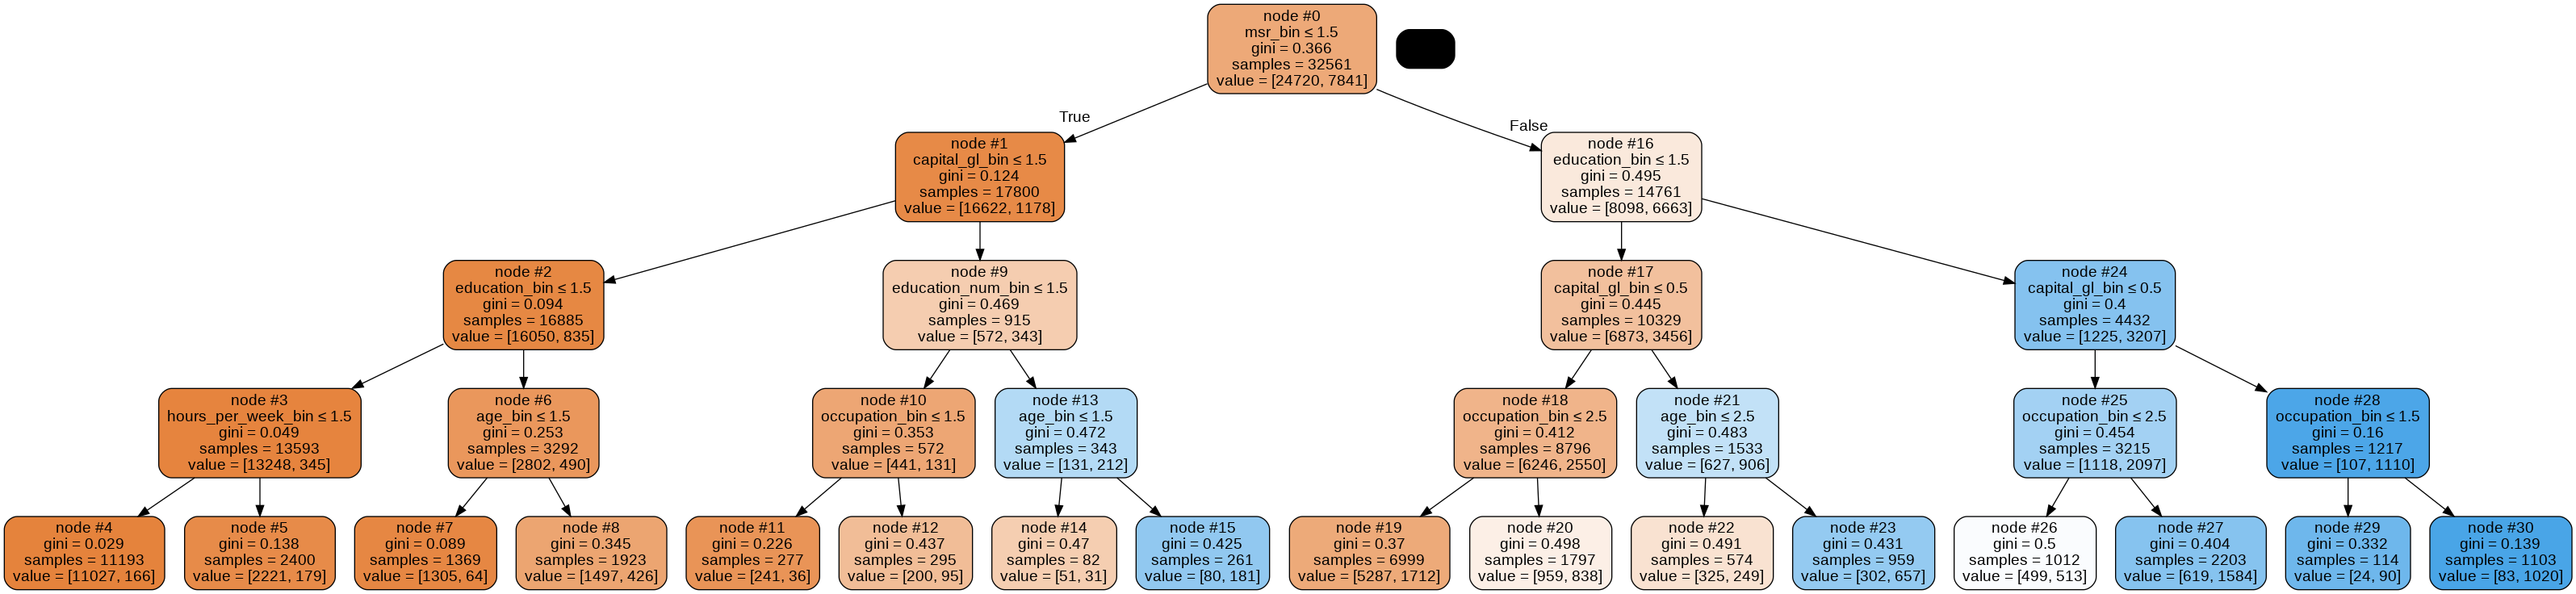

In [ ]:
#import visualization packages - see initial import packages cell 
#create visualization
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, node_ids=True,
                feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

2.5 : Evaluate Decision Tree Performance 

In [ ]:
#import visualization packages - see initial import packages cell
#Display the accuracy of model 
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8349609974817271


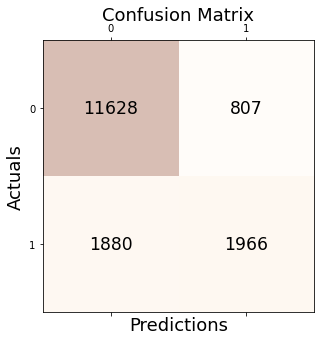

In [ ]:
#import visualization packages - see initial import packages cell
#Create and display confusion matrix to see the number of TP, TN, FP, FN predictions
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#create classification report to display precision, recall, f1 score 
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     12435
           1       0.71      0.51      0.59      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.72      0.75     16281
weighted avg       0.82      0.83      0.82     16281



In [ ]:
#display AUC value 
print("AUC Value:",roc_auc_score(y_test,y_pred))

AUC Value: 0.7231414901951928


ROC Curve:


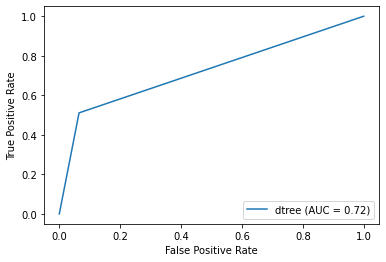

In [ ]:
#display ROC curve visualization with AUC score 
print("ROC Curve:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
 
roc_auc = roc_auc_score(y_test, y_pred)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="dtree")
display.plot()

#Part 3

3.6 Tune Decision Tree Performance  

Four Hyperparameters to vary: 
1. **Split Criteria** – ‘Entropy’ or ‘Gini Impurity’ 
2. **Minimum Sample Split** – Minimum number of records required in any node for a 
further split to be attempted 
3. **Minimum Sample Leaf** – Minimum of samples in a leaf node to stop further 
splitting (becomes a leaf node) 
4. **Maximum Depth** – Maximum depth of the tree allowed

In [ ]:
#set dtree classifier to train the model and then predict y_test
dtree_test = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=5, max_depth=100,random_state=110,max_features=None,criterion='gini')

#train model using training data
dtree_test.fit(x_train, y_train)

#predict using test data
y_pred1 = dtree_test.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred1))

print("accuracy:", accuracy_score(y_test, y_pred1))
print("recall score:",recall_score(y_test,y_pred1))
print("precision score:",precision_score(y_test,y_pred1))
print("f1 score:",f1_score(y_test,y_pred1))
print("AUC Value:",roc_auc_score(y_test,y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.56      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281

accuracy: 0.8401818070143111
recall score: 0.5590223608944358
precision score: 0.7035340314136126
f1 score: 0.6230078238191828
AUC Value: 0.7430817473953482


3.7 Conclusion and Best Model 

In [ ]:
%%time
#set detree classifier to train the model and then predict y_test
best = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=5, max_depth=100,random_state=110,max_features=None,criterion='gini')

#train model with training data
best.fit(x_train, y_train)

#predict y using test data
y_best = best.predict(x_test)

CPU times: user 68.1 ms, sys: 2.97 ms, total: 71.1 ms
Wall time: 91.7 ms


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.415461 to fit



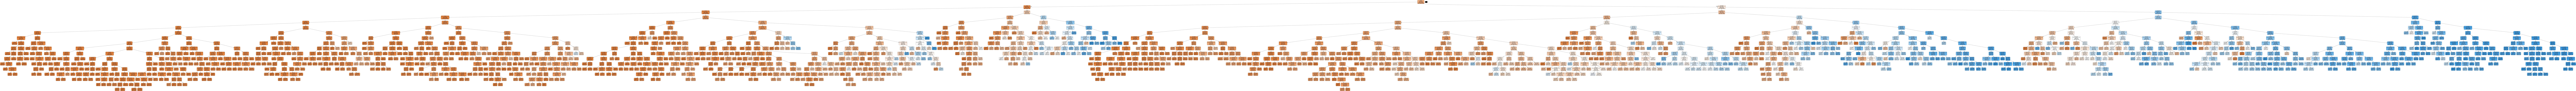

In [ ]:
#Display BEST decision tree
dot_data = StringIO()
export_graphviz(best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                node_ids=True, feature_names=x_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#Part 4

4.8 Automation of Performance Tuning

In [ ]:
#read in the csv file to begin automation
automation = pd.read_csv('/Tree Tuning Cases.csv')
automation

Split Criteria (Entropy or Gini)  Minimum Sample Split  ...  Precision  F1 Score
0                          entropy                     4  ...        NaN       NaN
1                          entropy                     4  ...        NaN       NaN
2                          entropy                     4  ...        NaN       NaN
3                          entropy                     8  ...        NaN       NaN
4                             gini                     2  ...        NaN       NaN
5                             gini                   100  ...        NaN       NaN
6                             gini                    20  ...        NaN       NaN
7                             gini                    20  ...        NaN       NaN

[8 rows x 8 columns]

In [ ]:
#verify column names
automation.columns

Index(['Split Criteria (Entropy or Gini)', 'Minimum Sample Split',
       'Minimum Sample Leaf', 'Maximum Depth', 'Accuracy', 'Recall',
       'Precision', 'F1 Score'],
      dtype='object')

In [ ]:
#create function that will allow values to be automatically filled in when attempting to identify best model 
#based on hard-coded hyperparameters 
accuracy_list = []
recall_list = []
precision_list = []
f1_list = []

for row in range(8):
  automation_slice = automation.iloc[0,0:4]
  for item in automation:
    item_slice = automation.iloc[0,0]
    item_slice_2 = automation.iloc[0,1]
    item_slice_3 = automation.iloc[0,2]
    item_slice_4 = automation.iloc[0,3]
    
    dtree = DecisionTreeClassifier(min_samples_split=item_slice_2, min_samples_leaf=item_slice_3, 
                                   max_depth=item_slice_4, random_state=101, max_features=None, criterion=item_slice)
 
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    
    accuracy_sc = accuracy_score(y_test, y_pred)
    recall_sc = recall_score(y_test, y_pred)
    precision_sc = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
 
  accuracy_list.append(accuracy_sc)
  recall_list.append(recall_sc)
  precision_list.append(precision_sc)
  f1_list.append(f1)
 
automation.loc[automation.Accuracy.isnull(), 'Accuracy'] = accuracy_list
automation.loc[automation.Recall.isnull(), 'Recall'] = recall_list
automation.loc[automation.Precision.isnull(), 'Precision'] = precision_list
automation.loc[automation['F1 Score'].isnull(), 'F1 Score'] = f1_list

In [ ]:
automation

Split Criteria (Entropy or Gini)  Minimum Sample Split  ...  Precision  F1 Score
0                          entropy                     4  ...   0.700944  0.622633
1                          entropy                     4  ...   0.700944  0.622633
2                          entropy                     4  ...   0.700944  0.622633
3                          entropy                     8  ...   0.700944  0.622633
4                             gini                     2  ...   0.700944  0.622633
5                             gini                   100  ...   0.700944  0.622633
6                             gini                    20  ...   0.700944  0.622633
7                             gini                    20  ...   0.700944  0.622633

[8 rows x 8 columns]

#Part 5 

5.9 Prediction using the Trained Decision Tree Model  

Prediction based on: 

• Hours Worked per Week = 48 

• Occupation Category = Mid - Low 

• Marriage Status & Relationships = High

• Capital Gain = Yes 

• Race-Sex Group = Mid 

• Number of Years of Education = 12

• Education Category = High 

• Work Class = Income
 
• Age = 58

In [ ]:
#create new record 
n_rec = {'hours_per_week_bin':'d. 41-50 & 61-70', 'occupation_bin':'b. Mid-Low' , 'msr_bin':'c. High',
              'capital_gl_bin':'c. > 0','race_sex_bin':'b. Mid',
              'education_num_bin':'b. 9-12', 'education_bin':'e. High',
              'workclass_bin':'b. income','age_bin':'d. 36-40 & 56-60'}
n_rec

{'age_bin': 'd. 36-40 & 56-60',
 'capital_gl_bin': 'c. > 0',
 'education_bin': 'e. High',
 'education_num_bin': 'b. 9-12',
 'hours_per_week_bin': 'd. 41-50 & 61-70',
 'msr_bin': 'c. High',
 'occupation_bin': 'b. Mid-Low',
 'race_sex_bin': 'b. Mid',
 'workclass_bin': 'b. income'}

In [ ]:
#create mock dataframe 
new_df = pd.DataFrame(data = n_rec, index=[0])

In [ ]:
#check the data type
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  1 non-null      object
 1   occupation_bin      1 non-null      object
 2   msr_bin             1 non-null      object
 3   capital_gl_bin      1 non-null      object
 4   race_sex_bin        1 non-null      object
 5   education_num_bin   1 non-null      object
 6   education_bin       1 non-null      object
 7   workclass_bin       1 non-null      object
 8   age_bin             1 non-null      object
dtypes: object(9)
memory usage: 80.0+ bytes


In [ ]:
#change datatype to category 
for column in ['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']:
    new_df[column] = new_df[column].astype('category')

In [ ]:
#check the data type
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   hours_per_week_bin  1 non-null      category
 1   occupation_bin      1 non-null      category
 2   msr_bin             1 non-null      category
 3   capital_gl_bin      1 non-null      category
 4   race_sex_bin        1 non-null      category
 5   education_num_bin   1 non-null      category
 6   education_bin       1 non-null      category
 7   workclass_bin       1 non-null      category
 8   age_bin             1 non-null      category
dtypes: category(9)
memory usage: 1.0 KB


In [ ]:
#use label encoder to convert data to labels 
new_df[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']]= census[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']].apply(LabelEncoder().fit_transform) 
#check that the output is as expected
new_df.head()

hours_per_week_bin  occupation_bin  ...  workclass_bin  age_bin
0                   1               1  ...              1        3

[1 rows x 9 columns]

In [ ]:
#use the best model to predict income level based on above criteria 
#output is [0.72] in the binary ([0,1]), meaning that the individual is 72% likely to have an income of above $50k 
new_pred = best.predict_proba(new_df)
new_pred

array([[0.27272727, 0.72727273]])